In [1]:
# Data Loading and Preprocessing

import pandas as pd

df = pd.read_csv('Churn_Modelling.csv', index_col=0)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df.drop(['CustomerId', 'Surname'],axis=1, inplace=True)

df['Geography'] = LabelEncoder().fit_transform(df['Geography'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

X = df.drop(('Exited'), axis=1).values
y = df[['Exited']].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=42)

In [2]:
# Converting input features between 0 and 1. Doing so helps the neural networks to adjust weight and biases more efficiently

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [3]:
X_train = scaler.fit_transform(X_train)

In [4]:
X_test = scaler.transform(X_test)    # Only performing transform on test set

In [5]:
from tensorflow.keras.models import Sequential   # Importing model
from tensorflow.keras.layers import Dense        # Importing Dense layer

In [6]:
model = Sequential()

model.add(Dense(10,activation='relu'))

model.add(Dense(5,activation='relu'))
#model.add(Dense(10,activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [7]:
model.fit(x=X_train,y=y_train,batch_size=128, epochs=400)

Train on 8000 samples
Epoch 1/400
8000/8000 [==============================] - 1s 129us/sample - loss: 0.6332
Epoch 2/400
8000/8000 [==============================] - 0s 26us/sample - loss: 0.5203
Epoch 3/400
8000/8000 [==============================] - 0s 25us/sample - loss: 0.5083
Epoch 4/400
8000/8000 [==============================] - 0s 25us/sample - loss: 0.5050
Epoch 5/400
8000/8000 [==============================] - 0s 25us/sample - loss: 0.5020
Epoch 6/400
8000/8000 [==============================] - 0s 25us/sample - loss: 0.4982
Epoch 7/400
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4907
Epoch 8/400
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4811
Epoch 9/400
8000/8000 [==============================] - 0s 25us/sample - loss: 0.4742
Epoch 10/400
8000/8000 [==============================] - 0s 25us/sample - loss: 0.4686
Epoch 11/400
8000/8000 [==============================] - 0s 27us/sample - loss: 0.4640
Epoch 12/400
8000/

In [8]:
ls = pd.DataFrame(model.history.history)

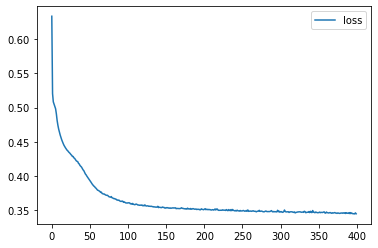

In [9]:
ls.plot()

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
predictions = model.predict_classes(X_test)

In [12]:
accuracy_score(y_test, predictions)

0.8605

In [13]:
confusion_matrix(y_test, predictions)

array([[1557,   50],
       [ 229,  164]], dtype=int64)

In [14]:
print(classification_report(y_test, predictions))   # Neural Net did quite good at '1' as comapred to logistic regression

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000

